In [7]:
import pandas as pd

In [8]:
act_apack = pd.read_csv("trace/mobilenet_v2/stats_activations_apack.csv")
w_apack = pd.read_csv("trace/mobilenet_v2/stats_weights_apack.csv")
act_256 = pd.read_csv("trace/mobilenet_v2/stats_activations_256.csv")
w_256 = pd.read_csv("trace/mobilenet_v2/stats_weights_256.csv")

act_apack_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_activations_apack.csv")
w_apack_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_weights_apack.csv")
act_256_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_activations_256.csv")
w_256_v3 = pd.read_csv("trace/mobilenet_v3_large/stats_weights_256.csv")

# Baseline APack

In [14]:
# Parse .comp files to get estimated comp ratio

def parse_comp(filename):
    with open(filename, "r") as f:
        # read the string
        data = f.read()
    return float(data)

v2_act = []
v2_w = []
v3_act = []
v3_w = []

d = "trace/mobilenet_v2/"

# iterate through directory and parse .comp files
for i in range(1,7):
    v2_act.append(parse_comp(d + f"input_{i}_flat.comp"))

for i in range(0,52):
    v2_w.append(parse_comp(d + f"weight_{i}_flat.comp"))

d = "trace/mobilenet_v3_large/"

for i in range(1,9):
    v3_act.append(parse_comp(d + f"input_{i}_flat.comp"))
    
for i in range(0,62):
    v3_w.append(parse_comp(d + f"weight_{i}_flat.comp"))

# Activations

In [10]:
act_apack

,Layer,Run Time,Build Time,Compression Ratio,Bits per Symbol
0,0,80.852871,5.001614,1.038185,7.705755
1,1,73.973466,4.916724,1.038185,7.705755
2,2,1.734431,4.241678,2.769586,2.889187
3,3,0.005473,4.344031,2.041674,3.919705
4,4,0.006142,4.652083,1.355177,5.903778


In [11]:
act_256

,Layer,Run Time,Build Time,Compression Ratio,Bits per Symbol
0,0,240.792047,0.310032,0.999983,8.000133
1,1,233.969397,0.325021,0.999983,8.000133
2,2,25.039795,0.337763,1.176255,6.801244
3,3,0.031423,0.313431,1.332505,6.003733
4,4,0.173761,0.364781,1.224470,6.533444


# Weights

In [22]:
import numpy as np
w_apack_mean
np.mean(v2_act)

1.8502442243201933

In [24]:
# get means along w_apack and w_256
w_apack_mean = w_apack.mean()["Compression Ratio"]
w_256_mean = w_256.mean()["Compression Ratio"]
w_orig_mean = np.mean(v2_w)

# get means along act_apack and act_256
act_apack_mean = act_apack.mean()["Compression Ratio"]
act_256_mean = act_256.mean()["Compression Ratio"]
act_orig_mean = np.mean(v2_act)

# do the same for v3
w_apack_mean_v3 = w_apack_v3.mean()["Compression Ratio"]
w_256_mean_v3 = w_256_v3.mean()["Compression Ratio"]
w_orig_mean_v3 = np.mean(v3_w)

act_apack_mean_v3 = act_apack_v3.mean()["Compression Ratio"]
act_256_mean_v3 = act_256_v3.mean()["Compression Ratio"]
act_orig_mean_v3 = np.mean(v3_act)

# display the means as a table, one for weights and one for activations
df_w = pd.DataFrame([w_apack_mean, w_256_mean, w_orig_mean, w_apack_mean_v3, w_256_mean_v3, w_orig_mean_v3])
df_w = df_w.transpose()
df_w.columns = ["w_apack", "w_256", "w_orig", "w_apack_v3", "w_256_v3", "w_orig_v3"]

df_act = pd.DataFrame([act_apack_mean, act_256_mean, act_orig_mean, act_apack_mean_v3, act_256_mean_v3, act_orig_mean_v3])
df_act = df_act.transpose()
df_act.columns = ["act_apack", "act_256", "act_orig", "act_apack_v3", "act_256_v3","act_orig_v3"]

In [25]:
df_w

,w_apack,w_256,w_orig,w_apack_v3,w_256_v3,w_orig_v3
0,1.261566,1.228623,1.265903,1.568444,1.384505,1.676456


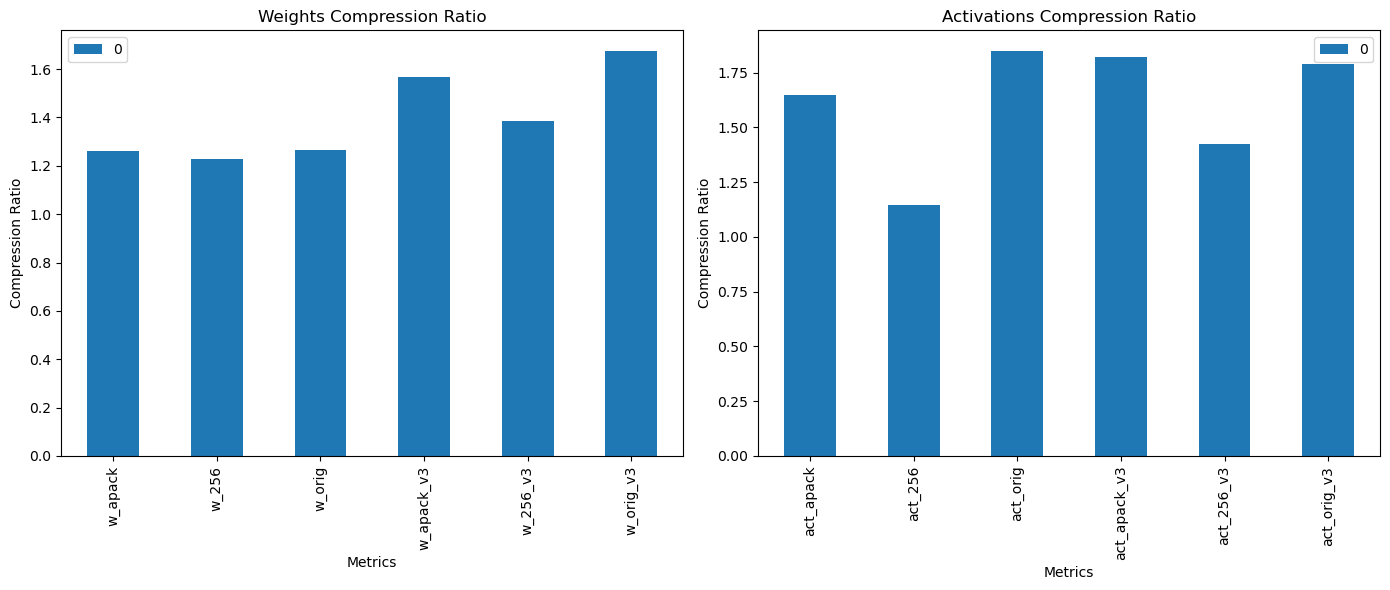

In [28]:
import matplotlib.pyplot as plt

# Define the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot weights compression ratio
df_w.T.plot(kind="bar", ax=axs[0])
axs[0].set_title("Weights Compression Ratio")
axs[0].set_ylabel("Compression Ratio")
axs[0].set_xlabel("Metrics")
axs[0].legend(loc="best")

# Plot activations compression ratio
df_act.T.plot(kind="bar", ax=axs[1])
axs[1].set_title("Activations Compression Ratio")
axs[1].set_ylabel("Compression Ratio")
axs[1].set_xlabel("Metrics")
axs[1].legend(loc="best")

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


In [32]:
# Compute how much the compression ratio has improved with APack
print("Weights Compression Ratio Improvement v2: ", df_w["w_apack"] / df_w["w_256"])
print("Activations Compression Ratio Improvement v2: ", df_act["act_apack"] / df_act["act_256"])

print("Weights Compression Ratio Improvement v3: ", df_w["w_apack_v3"] / df_w["w_256_v3"])
print("Activations Compression Ratio Improvement v3: ", df_act["act_apack_v3"] / df_act["act_256_v3"])

Weights Compression Ratio Improvement v2:  0    1.026813
dtype: float64
Activations Compression Ratio Improvement v2:  0    1.437733
dtype: float64
Weights Compression Ratio Improvement v3:  0    1.132855
dtype: float64
Activations Compression Ratio Improvement v3:  0    1.279473
dtype: float64


In [33]:
# compute how much worse the compression ratio is with APack compared to orig
print("Weights Compression Ratio Worsening v2: ", df_w["w_apack"] / df_w["w_orig"])
print("Activations Compression Ratio Worsening v2: ", df_act["act_apack"] / df_act["act_orig"])

print("Weights Compression Ratio Worsening v3: ", df_w["w_apack_v3"] / df_w["w_orig_v3"])
print("Activations Compression Ratio Worsening v3: ", df_act["act_apack_v3"] / df_act["act_orig_v3"])

Weights Compression Ratio Worsening v2:  0    0.996574
dtype: float64
Activations Compression Ratio Worsening v2:  0    0.890997
dtype: float64
Weights Compression Ratio Worsening v3:  0    0.935571
dtype: float64
Activations Compression Ratio Worsening v3:  0    1.016724
dtype: float64


<Axes: title={'center': 'Activations Run Time (ms)'}>

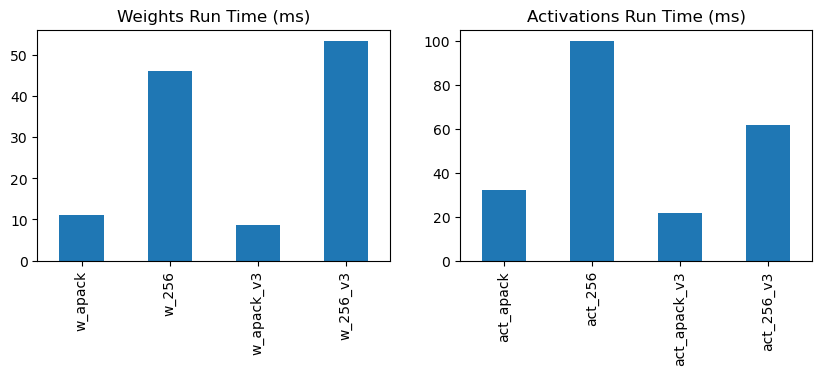

In [25]:
# plot the time means
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

df_w.loc["Run Time"].plot(kind="bar", ax=axs[0], title="Weights Run Time (ms)")
df_act.loc["Run Time"].plot(kind="bar", ax=axs[1], title="Activations Run Time (ms)")

In [1]:
!pip install tANS_py

In [1]:
import tANS_py

In [3]:
import tANS_py.Coder


s = ["A","B","C"]
f = [2,4,2]
c = tANS_py.Coder.Coder(sum(f), s, f)

In [6]:
msg = "ABBC"

c.encode_decode(list(msg)), len(msg) * 8

((['A', 'B', 'B', 'C'], 12), 32)